# Model Evaluation & Validation
##  Predicting Boston Housing Prices




In this project, I will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

The code cell below load the Boston housing dataset, along with a few of the necessary Python libraries required for this project.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each."\
.format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section I will make a cursory investigation about the Boston housing data and provide observations. Familiarity with the data through an explorative process is a fundamental practice to help better understand and justify the results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, I will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
Here I  will calculate descriptive statistics about the Boston housing prices. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, I will implement the following:
 - Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
 - Store each calculation in their respective variable.

In [2]:
# Minimum housing value in the dataset
minimum_price = prices.min()

# Maximum housing value in the dataset
maximum_price = prices.max()

# Mean house value of the dataset
mean_price = prices.mean()

# Median house value of the dataset
median_price = np.median(prices)

# Standard deviation of housing values of the dataset
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


###  - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


**Relation between the dependent and independent variables: **

An increase in RM would lead to an increase in the value of MDEV. This is because houses with more rooms (RM) are usually larger and therefore more expensive.

An increase in LSTAT will lead to a decrease in MDEV. This is because when LSTAT is high larger percentage of all Boston homeowners have a greater net worth than homeowners in the neighborhood, that indicate about poorer neighborhood and therefore lower house prices.

An increase in PTRATIO increases will lead to a decrease MDEV. This is because that higher the student to teacher ratio is, the less funding the school in the neighborhood probably has. That again indicate about poorer neighborhood and therefore lower house prices.

----

## Developing a Model
In this second section I will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in the predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, I will calculat the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify the model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, I will use the following:
-  `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# Put any import statements you need for this code block here

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    return r2_score(y_true, y_predict)


### Implementation: Shuffle and Split Data
Next I split the Boston housing dataset into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, I implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
- Split the data into 80% training and 20% testing.
- Set the `random_state` for `train_test_split` to ensure results are reproducible.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [4]:
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 80% training and 20% testing subsets,
        then returns the training and testing subsets. """

    X_train, X_test, y_train, y_test = \
    cross_validation.train_test_split(X, y, test_size=0.2)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(features, prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


###  - Training and Testing
When we are building a prediction model, there is always a risk of over fitting from one side and under fitting on the other side. The reason for that is that in most practical cases, you can increase the number of the model parameters (or degree of freedom) up to the point that the model will perfectly fit the data. However, such a model will not be practical and in particular will be useless when it comes to prediction a new set of data. Therefore it is important to train the model on one set of data and test the model on another set of data. When doing so we balance the model between over fitting and under fitting.

----

## Analyzing Model Performance
In this third section of the project, I'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, I'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing the model's performance based on varying criteria to visualizing behavior that may not have been apparent from the results alone.

### - Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  


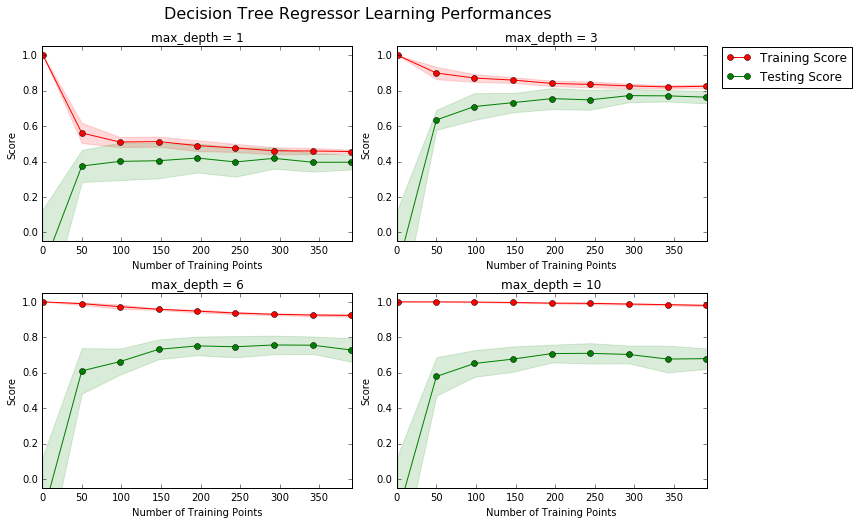

In [5]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

###  - Learning the Data



In all the charts the trend is quite similar. As the  training size increase the Training score decrease, that happen since for a given model complexity more data (more information) will be more difficult to generalize.  As the  training size increase the Testing score Increase, that happen since more Training data will build a more generalize model that will fit better to unseen data. 

The charts seems to have 2 phase, 1 sharp increase and then it stabilize. As we increase the training size, the model have more information that generalize the model better, after a point more data does not include more new information and the performance stabilize. 

Having more training points only seems to benifit the model up to around ~250 training points. Beyond that, the model does not benefit from increasing the training set.

### - Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  


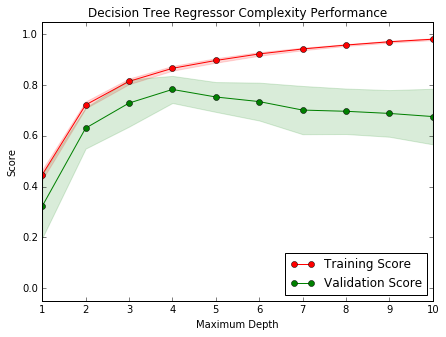

In [6]:
vs.ModelComplexity(X_train, y_train)

###  - Bias-Variance Tradeoff



***Max Depth 1

For the 'max depth' 1, the model suffers from high bias. This is apparent by the low score of the model as it perform on the training and the testing sets. Indicating that the model is not able to captured the general trend of the data. 


***Max Depth 10

For the 'max depth' 10, the model suffers from high variance. This is apparent by the low score of the model as it perform on the testing set and high score of the model as it perform on the testing set. Indicating the model capture even the noise in the training set, that in turn reduce the performance of the model on the testing set. 

### - Best-Guess Optimal Model



It seems that  'max depth' ~ 4  correspond with the optimal model. The maximum score for the testing set is a good indication about the optimal model obtained at this values. Another factor that we might want to consider here is the model simplicity, https://en.wikipedia.org/wiki/Occam%27s_razor 


-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

###  - Grid Search



Gridsearch is a function that allows us to test the performance of a given predictive model for different parameter settings. Gridsearch use cross validation to measure the performance of the model on different splits of the data set and use one of the available performance metric to appreciate the performance. Practically the function performs an Exhaustive search over specified parameter values for an estimator, changing one parameter at a time while measuring the performance. The output of this function, and that what make it so useful is the optimal parameter for the given model.

### - Cross-Validation



Cross validation allows us to estimate the performance of the model in the most general case possible on a giving data set.  Cross validation randomly generated train/test splits multiple times from the same data set. This process enables us to optimize the parameter of the algorithm independently many times, where the result is averaged over all splits. Therefore cross validation reduce the chance that the obtain performance is due to a single bad split of the data. Since the grid search is an optimization method, we want to avoid the situation of over fitting especially in the process of optimizing parameters. The fact that cross validation use all the data for training and testing and the fact that cross validation return the average performance make sure that the gridsearch result is more robust. 

### Implementation: Fitting a Model
For the final implementation we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, I will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, I  will implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [7]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric)

    # Make the GridSearchCV object
    grid = GridSearchCV(regressor, param_grid=parameters, \
                        scoring=scoring_function, cv=cv_sets)
    
    # Fit the learner to the data to obtain the optimal model with tuned parameters
    grid.fit(X, y)

    # Return the optimal model
    return grid.best_estimator_


### - Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

###  - Optimal Model


In [8]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".\
format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.



The optimal max depth is 4. This is similar with the maximum we identified for the testing score in the complexity chart. 

###  - Predicting Selling Prices
Consider the 3 houses as follow:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


The code block below run the optimized model to make predictions for each client's home.

In [9]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $407,633.33
Predicted selling price for Client 2's home: $233,604.00
Predicted selling price for Client 3's home: $823,200.00



My recommendations are:

Predicted selling price for Client 1's home: \$323,972.73

Predicted selling price for Client 2's home: \$231,153.66

Predicted selling price for Client 3's home: \$942,327.27

These prices seem reasonable relative to eachother. It makes sense the Client 3's prices are the highest due to the lowest student-teacher ratio, the highest household net worth and the highest total number of rooms. Client 1's is in the middle for all those categories and therefore has the median price of these 3. Client 2 has the the "worst" metric in each of these and is therefore left with the lowest price.

Relative to the overall stats, these stats also make sense. Client 1 has fewer rooms than the average in the data set (6.24), and is in the top 34% of the income which is lower than the average (13%) leading to his/her house being lower than the mean price in this dataset (~ $450,000). Although his/her student - teacher ratio is better than average, that does not seem to be enough to overcome the other factors.

A similar story plays out for Client 2 as well. Client 2 has fewer than average rooms, has lower income, and has a higher student-teacher ratio than average leading to a score well lower than the mean.

Finally, Client 3 has more than average rooms, a higher income, and a lower student-teacher ratio. Unsurprisingly, his/her house price is higher than the mean (only surprising part is perhaps how much higher than the mean it is).

### - Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. In the code here bellow I run the  the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [10]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22
